<a href="https://colab.research.google.com/github/vivianchen98/CAPTCHA-Booster/blob/main/CS_4501_V_%26_L_Final_project_CAPTCHA_Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 4501 Vision and Language Final Project #
Shenghui (Vivian) Chen (sc9by) 

Sophia Cheung (xz3ts) 

Margaret Cheng (cc8da)

## Import data ##

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/2020 Fall/CS 4501 V&L/samples.zip"

Archive:  /content/drive/My Drive/2020 Fall/CS 4501 V&L/samples.zip
   creating: samples/
 extracting: samples/226md.png       
 extracting: samples/22d5n.png       
 extracting: samples/2356g.png       
 extracting: samples/23mdg.png       
 extracting: samples/23n88.png       
 extracting: samples/243mm.png       
  inflating: samples/244e2.png       
  inflating: samples/245y5.png       
 extracting: samples/24f6w.png       
 extracting: samples/24pew.png       
 extracting: samples/25257.png       
  inflating: samples/253dc.png       
 extracting: samples/25egp.png       
  inflating: samples/25m6p.png       
 extracting: samples/25p2m.png       
 extracting: samples/25w53.png       
 extracting: samples/264m5.png       
 extracting: samples/268g2.png       
 extracting: samples/28348.png       
 extracting: samples/28x47.png       
  inflating: samples/2b827.png       
 extracting: samples/2bg48.png       
 extracting: samples/2cegf.png       
  inflating: samples/2cg58.png      

## Process Data

In [3]:
import torch, os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor

DATASET_PATH = "/content/samples"

source = [str(i) for i in range(0, 10)]
source += [chr(i) for i in range(97, 97+26)]
alphabet = ''.join(source)

class mydataset(Dataset):

    def __init__(self, folder = 'DATASET_PATH', img_transform=None, alphabet=alphabet, num_class=36):
        self.DATASET_PATH = "/content/samples"
        print('Loading %s ...' % self.DATASET_PATH, end = '\n')
        self.image_file_paths = [os.path.join(folder, image_file) for image_file in os.listdir(folder)]
        self.labels = [filename.split('.')[0] for filename in os.listdir(folder)]
        self.transforms = img_transform
        self.alphabet = alphabet
        self.num_class = 36
        print('Finished')

    def __len__(self):
        return (len(self.labels))

    def __getitem__(self, index):
        # Load images on the fly.
        image_root = self.image_file_paths[index]
        image_name = image_root.split(os.path.sep)[-1]
        image = Image.open(image_root).convert('RGB')
        if image.size != (200, 50):
            image = cv2.resize(np.float32(image), (200, 50), interpolation = cv2.INTER_NEAREST)
        if self.transforms is not None:
            image = self.transforms(image)

        # Load label, how to encode?
        label = self.labels[index]
        target = []
        for char in label:
          vec = [0] * self.num_class
          vec[alphabet.find(char)] = 1
          # print(vec)
          target += vec


        return image, label, torch.Tensor(target)

Print one element from this dataset, both the image and the label

Loading /content/samples ...
Finished
Data size: 1070 samples


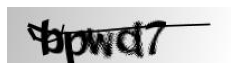

size of img:  200 50 total pixel:  10000
img:  <PIL.Image.Image image mode=RGB size=200x50 at 0x7FC9D88CBDD8>
Label:  bpwd7
Target:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [4]:
# Display use
dataset = mydataset(DATASET_PATH, img_transform=None)
print('Data size: %d samples' % len(dataset))

ID = 333
img, label, target = dataset[ID]

# Show input image.
plt.figure(figsize=(4,5));plt.imshow(img); plt.axis(False);plt.show()
width, height = img.size
print("size of img: ", width, height, "total pixel: ", width*height)
print("img: ", img)
print('Label: ', label)
print('Target: ', target)

In [5]:
# Real dataset
from torch.utils.data import random_split

img_transforms = Compose([ToTensor()])
dataset = mydataset(DATASET_PATH, img_transform=img_transforms)
train_set, val_set = random_split(dataset, [700, 370], generator=torch.Generator().manual_seed(42))
print(len(train_set))
print(len(val_set))

batch_size = 10
train_data_loader = DataLoader(train_set, batch_size=batch_size, num_workers=0, shuffle=True, drop_last=True)
val_data_loader = DataLoader(val_set, batch_size=batch_size, num_workers=0, shuffle=True, drop_last=True)

Loading /content/samples ...
Finished
700
370


# Train the model

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import torch.nn as nn

class CNN(nn.Module):
	def __init__(self, num_class=36, num_char=5):
	    super(CNN, self).__init__()
	    self.num_class = num_class
	    self.num_char = num_char
	    self.conv = nn.Sequential(
	            #batch*1*200*50
	            nn.Conv2d(3, 16, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(16),
	            nn.ReLU(),
	            #batch*16*90*50
	            nn.Conv2d(16, 64, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(64),
	            nn.ReLU(),
	            #batch*64*45*25
	            nn.Conv2d(64, 512, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(512),
	            nn.ReLU(),
	            #batch*512*22*12
	            nn.Conv2d(512, 512, 3, padding=(1, 1)),
	            nn.MaxPool2d(2, 2),
	            nn.BatchNorm2d(512),
	            nn.ReLU(),
	            #batch*512*11*6
	            )
	    self.fc = nn.Linear(512*12*3, self.num_class*self.num_char)
	    
	def forward(self, x):
	    x = self.conv(x)
	    x = x.view(-1, 512*12*3)
	    x = self.fc(x)
	    return x

In [8]:
import time
from torch.autograd import Variable

batch_size = 128
base_lr = 0.001
max_epoch = 20
model_path = './drive/MyDrive/2020 Fall/CS 4501 V&L/captcha_model.pth'
# restor = False

def calculate_acc(output, target):
    output, target = output.view(-1, 36), target.view(-1, 36)
    output = nn.functional.softmax(output, dim=1)
    output = torch.argmax(output, dim=1)
    target = torch.argmax(target, dim=1)
    output, target = output.view(-1, 5), target.view(-1, 5)
    correct_list = []
    for i, j in zip(target, output):
        if torch.equal(i, j):
            correct_list.append(1)
        else:
            correct_list.append(0)
    acc = sum(correct_list) / len(correct_list)
    return acc

def train():
    cnn = CNN()
    if torch.cuda.is_available():
        cnn.cuda()
#     if restor:
#         cnn.load_state_dict(torch.load(model_path))
# #        freezing_layers = list(cnn.named_parameters())[:10]
# #        for param in freezing_layers:
# #            param[1].requires_grad = False
# #            print('freezing layer:', param[0])
    
    optimizer = torch.optim.Adam(cnn.parameters(), lr=base_lr)
    criterion = nn.MultiLabelSoftMarginLoss()
    
    for epoch in range(max_epoch):
        start_ = time.time()
        
        loss_history = []
        acc_history = []
        cnn.train()
        for img, label, target in train_data_loader:
            # img = Variable(img)
            # target = Variable(target)
            if torch.cuda.is_available():
                img = img.cuda()
                target = target.cuda()
            output = cnn(img)
            # print("Output: ", output, output.size())
            # print("Target: ", target, target.size())
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = calculate_acc(output, target)
            acc_history.append(float(acc))
            loss_history.append(float(loss))
        print('train_loss: {:.4}|train_acc: {:.4}'.format(
                torch.mean(torch.Tensor(loss_history)),
                torch.mean(torch.Tensor(acc_history)),
                ))
        
        loss_history = []
        acc_history = []
        cnn.eval()
        for img, label, target in val_data_loader:
            # img = Variable(img)
            # target = Variable(target)
            if torch.cuda.is_available():
                img = img.cuda()
                target = target.cuda()
            output = cnn(img)
            
            acc = calculate_acc(output, target)
            acc_history.append(float(acc))
            loss_history.append(float(loss))
        print('test_loss: {:.4}|test_acc: {:.4}'.format(
                torch.mean(torch.Tensor(loss_history)),
                torch.mean(torch.Tensor(acc_history)),
                ))
        print('epoch: {}|time: {:.4f}'.format(epoch, time.time()-start_))
        torch.save(cnn.state_dict(), model_path)

In [ ]:
train()

train_loss: 0.1724|train_acc: 0.0
test_loss: 0.1297|test_acc: 0.002703
epoch: 0|time: 59.5140
train_loss: 0.06943|train_acc: 0.07714
test_loss: 0.05132|test_acc: 0.04324
epoch: 1|time: 65.5842
train_loss: 0.02252|train_acc: 0.6314
test_loss: 0.01281|test_acc: 0.2919
epoch: 2|time: 59.3774
train_loss: 0.00589|train_acc: 0.9557
test_loss: 0.006527|test_acc: 0.5027
epoch: 3|time: 59.2454
train_loss: 0.001874|train_acc: 0.9943
test_loss: 0.001622|test_acc: 0.5838
epoch: 4|time: 59.3402
train_loss: 0.0008692|train_acc: 1.0
test_loss: 0.0009729|test_acc: 0.6162
epoch: 5|time: 59.1395
train_loss: 0.0004564|train_acc: 0.9986
test_loss: 0.0002131|test_acc: 0.6676
epoch: 6|time: 59.3065
train_loss: 0.0001797|train_acc: 1.0
test_loss: 0.0001702|test_acc: 0.6514
epoch: 7|time: 59.5351
train_loss: 0.0001257|train_acc: 1.0
test_loss: 0.000154|test_acc: 0.6784
epoch: 8|time: 60.6953
train_loss: 9.62e-05|train_acc: 1.0
test_loss: 9.148e-05|test_acc: 0.6865
epoch: 9|time: 61.3217
train_loss: 7.526e-05|

# Test the model

In [9]:
# Reload the model
model = CNN()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [10]:
from torchsummary import summary

summary(model, (3, 200, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 200, 50]             448
         MaxPool2d-2          [-1, 16, 100, 25]               0
       BatchNorm2d-3          [-1, 16, 100, 25]              32
              ReLU-4          [-1, 16, 100, 25]               0
            Conv2d-5          [-1, 64, 100, 25]           9,280
         MaxPool2d-6           [-1, 64, 50, 12]               0
       BatchNorm2d-7           [-1, 64, 50, 12]             128
              ReLU-8           [-1, 64, 50, 12]               0
            Conv2d-9          [-1, 512, 50, 12]         295,424
        MaxPool2d-10           [-1, 512, 25, 6]               0
      BatchNorm2d-11           [-1, 512, 25, 6]           1,024
             ReLU-12           [-1, 512, 25, 6]               0
           Conv2d-13           [-1, 512, 25, 6]       2,359,808
        MaxPool2d-14           [-1, 512

In [12]:
import numpy as np

def create_batch(dataset):
  # take a random batch from val_data_loader
  for img, label, target in dataset:
      output = model(img)
      # print(output)
      print(label)
      break
  return img, output, label

img, output, label = create_batch(val_data_loader)

('f22bn', 'mnef5', '42xpy', 'd22bd', 'fcey3', 'n8pfe', '3n7mx', 'ypp8f', '5p8fm', '6m5eg')


In [ ]:
@anvil.server.callable
def visulize_batch():
  return ' | '.join(label)

In [11]:
def test_batch(output, label):
  pred_batch = []
  count = 0
  for row in output:
    output = row.detach().numpy().reshape(5,36)
    # print(output)

    pred = []
    for r in output:
      ind = np.argmax(r, axis=0)
      # print(ind, source[ind])
      pred.append(source[ind])
      # print the prediction of the first captcha
    pred = ''.join(pred)
    # print("Prediction of first captcha: ", pred)
    pred_batch.append(pred)

    lab = label[count]
    print("Label: "+ lab + " | Prediction: "+ pred + " | Match? ", lab == pred)
    count += 1

  # print(pred_batch)

test_batch(output, label)

Label: 5f3gf | Prediction: 5f3gf | Match?  True
Label: e43ym | Prediction: e43ym | Match?  True
Label: wyc25 | Prediction: wyc25 | Match?  True
Label: w2yp7 | Prediction: w2yp7 | Match?  True
Label: 6wb76 | Prediction: 6wb75 | Match?  False
Label: 73mnx | Prediction: 73nnx | Match?  False
Label: cdf77 | Prediction: cdf77 | Match?  True
Label: ngn26 | Prediction: ngn26 | Match?  True
Label: 32cnn | Prediction: 32cnn | Match?  True
Label: g7gnf | Prediction: g7gnf | Match?  True


In [ ]:
@anvil.server.callable
def visulize_batch():
  return ' | '.join(label)

# Iteratively generate new captcha

In [12]:
!pip install captcha

     |████████████████████████████████| 102kB 4.9MB/s 


In [13]:
from captcha.image import ImageCaptcha

image = ImageCaptcha()
os.mkdir("new_test_captcha")

In [14]:
# create new captcha based on test label
for cap in label:
  data = image.generate(cap)
  image.write(cap, 'new_test_captcha/'+cap+'.png')

In [15]:
# read in new captcha
new_test_captcha = mydataset("/content/new_test_captcha", img_transform=img_transforms)
train_data_loader = DataLoader(new_test_captcha, batch_size=batch_size, num_workers=0)

# apply the model on the new captcha data
for img, test_label, target in train_data_loader:
    test_output = model(img)
    #print(output)
    print(test_label)
    break

Loading /content/samples ...
Finished
('w2yp7', 'ngn26', 'wyc25', 'g7gnf', 'e43ym', '5f3gf', 'cdf77', '6wb76', '73mnx', '32cnn')


In [16]:
test_batch(test_output, test_label)

Label: w2yp7 | Prediction: w83ce | Match?  False
Label: ngn26 | Prediction: f8f57 | Match?  False
Label: wyc25 | Prediction: w42ge | Match?  False
Label: g7gnf | Prediction: wg2g4 | Match?  False
Label: e43ym | Prediction: w5ggp | Match?  False
Label: 5f3gf | Prediction: wwcye | Match?  False
Label: cdf77 | Prediction: wc2ge | Match?  False
Label: 6wb76 | Prediction: ywyce | Match?  False
Label: 73mnx | Prediction: pg8g4 | Match?  False
Label: 32cnn | Prediction: y42g4 | Match?  False
